In [2]:
from sklearn import datasets
from sklearn import cross_validation
from sklearn import linear_model
from sklearn import metrics
from sklearn import tree
from sklearn import neighbors
from sklearn import svm
from sklearn import ensemble
from sklearn import cluster
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 机器学习速揽

统计学的方法和机器学习的方法上是有区别的。统计学方法通过创建模型，并通过拟合数据来调整参数，来理解数据是如何生成的。如果创建的模型可以很好地拟合数据，并满足相关的模型假设，那么模型就给出了数据生成的总体描述过程，且他就可以被用于计算具有已知分布的统计和评估统计测试。如果数据太复杂不能使用以后的可用模型来解释，那么这个方法就到达了他的极限。

而另一方面，在机器学习中数据的真实生成过程以及潜在的模型并不是他关注的重点，相反，观测数据和解释变量是机器学习引用的起点。给定数据，机器学习方法可以寻找数据的模式和结构，它可以用于预测新数据的输出。因此机器学习不提供理解数据是如何生成的，同时因为作出更少的对于数据统计属性和分布的假设，我们无法计算统计信息和关于确定观测的重要性的统计检测。相反，机器学习更加强调新观测数据预测的准确性。

# 回归

在数据中并不会每个特征都是有用的，如下示例，使用 sklearn 生成 50 条数据，每条数据的特征也是 50 个，其中有效特征是 10 个，以此数据为基础探索回归的相关问题。

## 普通回归

In [27]:
# 生成数据并切分
X_all, y_all = datasets.make_regression(n_samples=50, n_features=50, n_informative=10)
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X_all, y_all, train_size=0.5)

# 创建模型并拟合
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

# 创建损失计算函数 SSE
def sse(resid):
    return np.sum(resid**2)

# 训练损失和预测损失
resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_test)
print('train sse:', sse_train, 'test sse:', sse_test)

train sse: 1.54488310868e-24 test sse: 430690.531188


从上面可以看到训练损失几乎为零，为测试损失却非常的大，说明模型已经有过拟合症状。除了使用 SSE 的计算方法，还可以通过 sklearn 的 `score` 计算 R2分数，分数越激进 1.0 说明表现越好，如下：
```python
In [20]: model.score(X_train, y_train)
Out[20]: 1.0
In [21]: model.score(X_test, y_test)
Out[21]: 0.31407400675201746
```
可以看到在训练数据上表现很好，但在测试数据上表现就很糟糕。以下通过可视化的方法来直观的看一下模型在训练和测试数据的误差表现，以及参数的尺度分布。

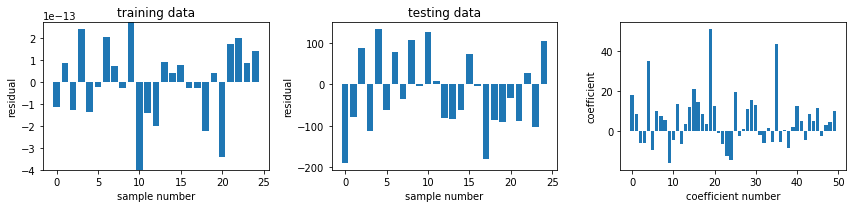

In [12]:
def plot_residuals_and_coeff(resid_train, resid_test, coeff):
    fig, axes = plt.subplots(1, 3, figsize=(12, 3))
    axes[0].bar(np.arange(len(resid_train)), resid_train)
    axes[0].set_xlabel("sample number")
    axes[0].set_ylabel("residual")
    axes[0].set_title("training data")
    axes[1].bar(np.arange(len(resid_test)), resid_test)
    axes[1].set_xlabel("sample number")
    axes[1].set_ylabel("residual")
    axes[1].set_title("testing data")
    axes[2].bar(np.arange(len(coeff)), coeff)
    axes[2].set_xlabel("coefficient number")
    axes[2].set_ylabel("coefficient")
    fig.tight_layout()
    return fig, axes
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)
plt.show()

可以看到，在训练集的数据上每条数据的误差几乎为零，而在训练集上每条数据的误差特别的大。对与过拟合的问题就需要想办法解决，这就要用到正则化的方法。正则化分为两种，L1和 L2正则化，L1又叫 LASSO，L2又叫岭回归（Ridge），数学形式的表示如下 其中 $\alpha$ 是正则化强度：
$$
\large{
\begin{split}
L1 \rightarrow \Arrowvert X\beta - y\Arrowvert_2^2 + \alpha \Arrowvert \beta \Arrowvert_1 \\
L2 \rightarrow \Arrowvert X\beta - y\Arrowvert_2^2 + \alpha \Arrowvert \beta \Arrowvert_2
\end{split}
}
$$

两种正则化方法有各自的特点， `L1`倾向于让重要的特征发挥更大的作用，而让不重要或者不相关的特征在其中不起作用，因此 L1更倾向于让系数为零，为零的比例可以通过 $\alpha$ 这个超参来调节，之后以后看到不同的 $\alpha$ 对于系数的影响。`L2` 倾向于让系数的尺度变小。

## 岭回归

train sse: 1573.59483567 test sse: 232098.56624


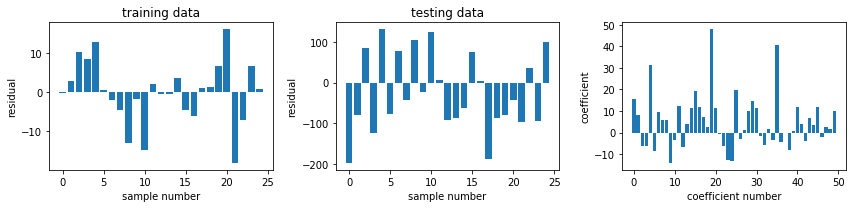

In [14]:
# 创建模型并拟合
model = linear_model.Ridge(alpha=2.5)
model.fit(X_train, y_train)

# 训练损失和预测损失
resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_test)
print('train sse:', sse_train, 'test sse:', sse_test)
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)

## LASSO

train sse: 671.899173876 test sse: 120523.996778


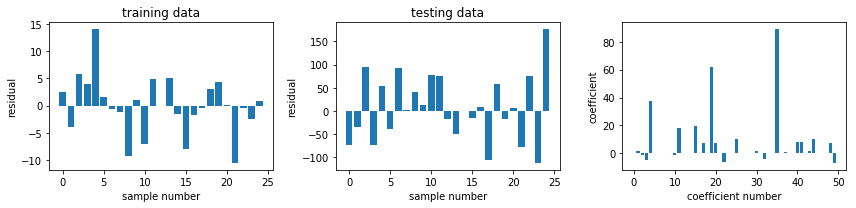

In [15]:
model = linear_model.Lasso(alpha=1.0)
model.fit(X_train, y_train)
resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_test)
print('train sse:', sse_train, 'test sse:', sse_test)
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)

在生成数据中设置了 50 个特征中只有 10 个有效特征，从系数图表中可以看到，LASSO 最终生成的系数中只有少数个系数为零的参数，说明 LASSO 筛选出了对最终结果由重大影响的特征。

## α 的影响

In [ ]:
alphas = np.logspace(-4, 2, 100)
coeffs = np.zeros((len(alphas), X_train.shape[1]))
sse_train = np.zeros_like(alphas)
sse_test = np.zeros_like(alphas)

# 可用空间搜索
for n, alpha in enumerate(alphas):
    model = linear_model.Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    coeffs[n, :] = model.coef_
    sse_train[n] = sse(y_train - model.predict(X_train))
    sse_test[n] = sse(y_test - model.predict(X_test))

# 绘图
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharex=True)
for n in range(coeffs.shape[1]):
    axes[0].plot(np.log10(alphas), coeffs[:, n], color='k', lw=0.5)

axes[1].semilogy(np.log10(alphas), sse_train, label="train")
axes[1].semilogy(np.log10(alphas), sse_test, label="test")
axes[1].legend(loc=0)

axes[0].set_xlabel(r"${\log_{10}}\alpha$", fontsize=18)
axes[0].set_ylabel(r"coefficients", fontsize=18)
axes[1].set_xlabel(r"${\log_{10}}\alpha$", fontsize=18)
axes[1].set_ylabel(r"sse", fontsize=18)
plt.show()

![img](https://wx2.sinaimg.cn/large/69d4185bly1fyd1261w6ej20kh07q75c.jpg)
可以看到 $\alpha$ 很小时，大部分系数不为零，随着 $\alpha$ 值的增加系数为零项越来越多。同时在损失图中，随着 $\alpha$ 的增加 测试 损失先是下降让后增加，因此不是 $\alpha$ 越大越好，我们需要找到最合适的 $\alpha$ 值。虽然通过上图无法确定具体的 $\alpha$ 值，但是可以确定大概范围，接下来就可以使用 sklearn 提供的 `LassoCV` 和 `RidgeCV` 来寻找最佳 $\alpha$ 值。

best alpha: 0.108350458494
train sse: 4.20645257507 test sse: 6.18136065526


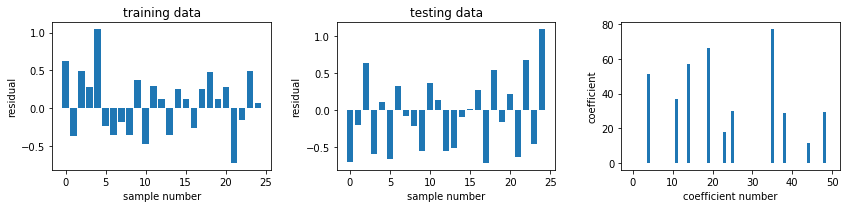

In [21]:
model = linear_model.LassoCV()
model.fit(X_all, y_all)
print('best alpha:', model.alpha_)
resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_test)
print('train sse:', sse_train, 'test sse:', sse_test)
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)

可以看到寻找到的最佳 $\alpha$ 为 0.108 ，与我们可视化的结果很接近。在此参数下可以看到得到的系数也更加的系数。

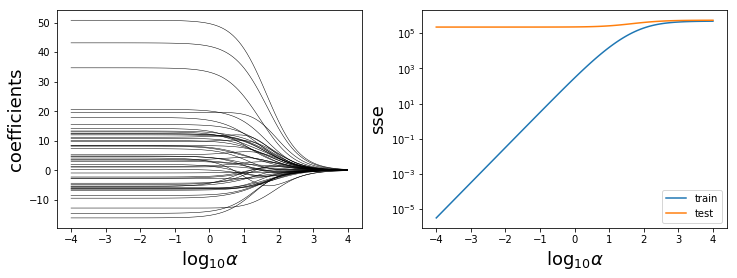

In [26]:
alphas = np.logspace(-4, 4, 100)
coeffs = np.zeros((len(alphas), X_train.shape[1]))
sse_train = np.zeros_like(alphas)
sse_test = np.zeros_like(alphas)

# 可用空间搜索
for n, alpha in enumerate(alphas):
    model = linear_model.Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    coeffs[n, :] = model.coef_
    sse_train[n] = sse(y_train - model.predict(X_train))
    sse_test[n] = sse(y_test - model.predict(X_test))

# 绘图
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharex=True)
for n in range(coeffs.shape[1]):
    axes[0].plot(np.log10(alphas), coeffs[:, n], color='k', lw=0.5)

axes[1].semilogy(np.log10(alphas), sse_train, label="train")
axes[1].semilogy(np.log10(alphas), sse_test, label="test")
axes[1].legend(loc=0)

axes[0].set_xlabel(r"${\log_{10}}\alpha$", fontsize=18)
axes[0].set_ylabel(r"coefficients", fontsize=18)
axes[1].set_xlabel(r"${\log_{10}}\alpha$", fontsize=18)
axes[1].set_ylabel(r"sse", fontsize=18)
plt.show()

best alpha: 1.0
train sse: 569.019347283 test sse: 683.824441216


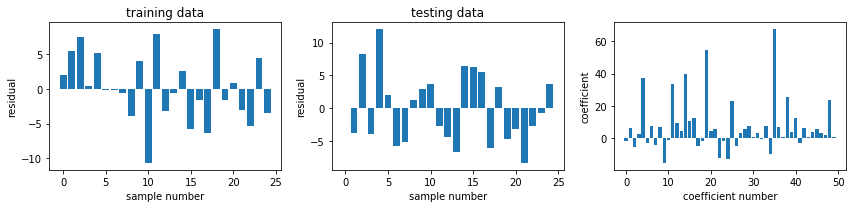

In [23]:
model = linear_model.RidgeCV()
model.fit(X_all, y_all)
print('best alpha:', model.alpha_)
resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_test)
print('train sse:', sse_train, 'test sse:', sse_test)
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)

对比 L1 与 L2 正则化效果如下图，可以看到 L1 会让大多数参数值变为0，而 L2 倾向于限制参数值的尺度（L1 比 L2参数值大了约两倍）：
![image](https://ws4.sinaimg.cn/large/69d4185bly1fyd3g7gtvij20ke0dwwgc.jpg)

## 混合正则化

除了上面两种正则化，sklearn 还提供了将两者混合在一起使用的方法，叫做 `ElasticNet`，数学的过表达形式为：
$$
\large{
\begin{split}
\Arrowvert X\beta - y\Arrowvert_2^2 + \alpha\rho \Arrowvert \beta \Arrowvert_1 + \alpha(1 - \rho) \Arrowvert \beta \Arrowvert_2
\end{split}
}
$$

$\rho$ 为 L1 正则化的比例：

best alpha: 0.21592154737
train sse: 2021.00978418 test sse: 226902.603229


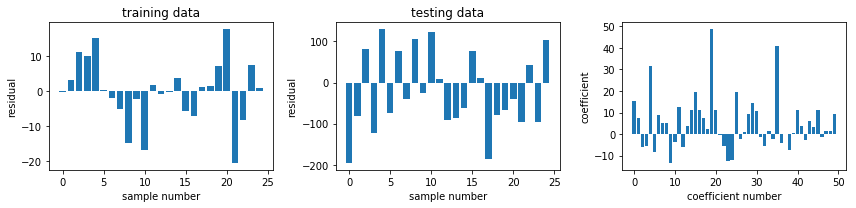

In [22]:
model = linear_model.ElasticNetCV()
model.fit(X_train, y_train)
print('best alpha:', model.alpha_)
resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_test)
print('train sse:', sse_train, 'test sse:', sse_test)
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)